In [1]:
import sys
sys.path.append('/ssd/kangdang/mmc_project_2023_submission/main_exp_code/step4_exp_analysis')

import pickle
import numpy as np
import os
import os.path as pathlib
from stats_fun import get_score_and_gt, get_statistic_info, cal_ci95
import matplotlib.pyplot as plt
import pandas as pd

# image only result
test_result = pickle.load(open('/ssd/kangdang/mmc_project_2023_submission/external_test_code/img_only/top_checkpoint_ensemble_external_test_result.pickle', 'rb'))
test_pred = test_result['pred_set']
test_gt = test_result['gt_set']
auc95_dl, fpr_dl, tpr_dl, auc_dl = get_statistic_info(test_gt, test_pred)
print(auc95_dl, auc_dl)

[0.7572539928776585, 0.7864141174818793] 0.772053429384242


In [2]:
len(test_gt)

3899

In [3]:
def get_indicator_all_results():
    external = pd.read_csv('/ssd/kangdang/mmc_project_2023_submission/external_test_code/fusion/external_test_lr.csv')
    indicator_name_list = ['Gender', 'Age', 'Diastolic Bp', 'Systolic Bp',  'Heart Rate', 'BMI', 'Course of Diabetes', 'Hypertension', 'Hyperlipidemia', 'Cardiovascular Disease', 'Classification of smoker', 'Classification of drinker']
    result_dict = dict()
    for indicator_id, indicator_name in enumerate(indicator_name_list):
        print(indicator_name)
        test_gt_list = external['gt']
        test_pred_list = external['param' + str(indicator_id + 1)]
        auc95, fpr, tpr, auc = get_statistic_info(test_gt_list, test_pred_list)
        result_dict[indicator_name] = [auc95, fpr, tpr, auc]
    return result_dict

result_dict = get_indicator_all_results()
sort_dict = dict()
for key, value in result_dict.items():
    sort_dict[key] = -value[-1]
sort_keys = sorted(sort_dict, key=sort_dict.get)

Gender
Age
Diastolic Bp
Systolic Bp
Heart Rate
BMI
Course of Diabetes
Hypertension
Hyperlipidemia
Cardiovascular Disease
Classification of smoker
Classification of drinker


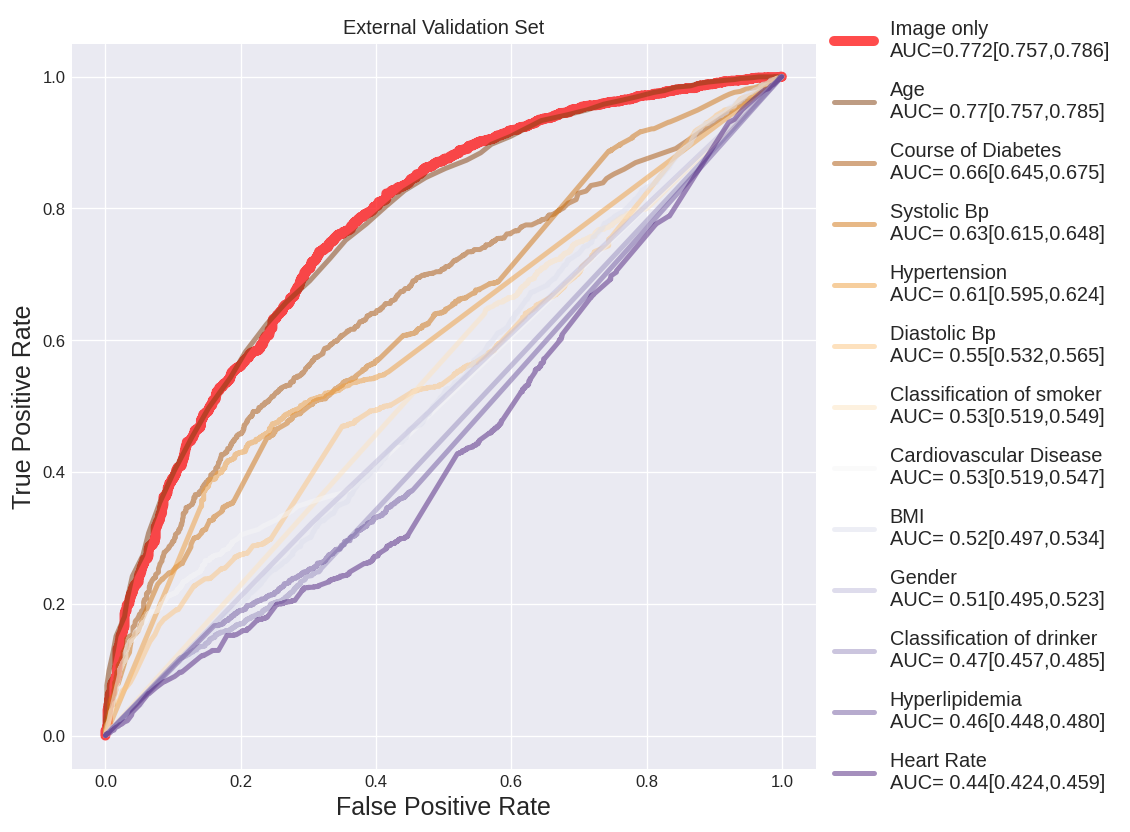

In [5]:
import matplotlib as mpl
my_dpi=120
plt.figure(figsize=(960/my_dpi, 960/my_dpi), dpi=my_dpi)
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set3')
plt.plot(fpr_dl, tpr_dl, marker='', color='red', linewidth=6, alpha=0.7, label='Image only\nAUC='+ "{:.3f}".format(auc_dl)+ '[{:.3f}'.format(auc95_dl[0]) + ',{:.3f}'.format(auc95_dl[1]) + ']')
cmap = mpl.cm.get_cmap('PuOr')
prespace = [12, 3, 0, 3, 3, 0, 0, 3, 6, 3, 6, 0]
for idx, key in enumerate(sort_keys):
    value = result_dict[key]
    fpr = value[1]
    tpr = value[2]
    label = key + '\nAUC= ' + "{:.2f}".format(value[3]) + '[{:.3f}'.format(value[0][0]) + ',{:.3f}'.format(value[0][1]) + ']'
    color = cmap((idx/len(sort_keys)))
    plt.plot(fpr,tpr, marker='', color=color, linewidth=3, alpha=0.5, label=label)
plt.legend(prop={'size': 14})

ax=plt.gca()
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("External Validation Set")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),labelspacing=1, prop={'size': 12})
